# Health Survey Data Analysis

By Jonathan P. Newcomb

## Executive Summary

This project involves preliminary data cleaning and a statistical analysis on data collected through a physical health survey conducted by the Center for Disease and Control (CDC). The analysis will focus on health data contained in a `PHYSHLTH` variable and include inferential methods such as the construction of a confidence interval that has at least a 95 percent probability of containing the true population mean for the aforementioned `PHYSHLTH` variable.  The analysis will then divide the `PHYSHLTH` data between those persons who reported owning their home and those who reported renting their home, and visualize any differences in the two subset means/distributions. Utilizing a two tailed t-test, the analysis will evaluate the difference in the two subset means for statistical significance, and describe the findings/conclusions.     

## The Data

This project uses health data obtained from [CDC Behavioral Risk Factor Surveillance System(BRFSS)](https://www.cdc.gov/brfss/data_documentation/index.htm). The responses constituting the subject health data were obtained from a 2020-2021 random survey of members from the total population of the State of New York.  Each record represents a response - each response reports the number of days a person's physical health and well being was "not good" over a 30 day period.  Further details on the `PHYSHLTH` variable, and the `RENTHOM1` variable used to subset the data, can be found in the [CDC codebook](https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf).   

In [276]:
# WE IMPORT ALL RELEVANT PACKAGES TO PERFORM CALCULATIONS AND DATA CLEANING
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

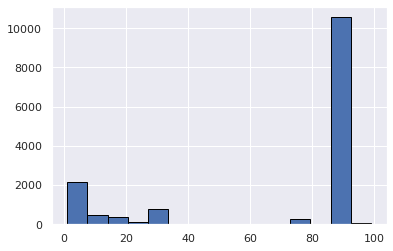

In [277]:
# WE FIRST TAKE A LOOK AT THE DISTRIBUTION TO VERIFY UNNECESSARY PLACEHOLDER VALUES
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'], edgecolor="black", bins=15);

## Data Preparation
First we will use some data cleaning techniques to prepare our data for the main analysis. As such, we will remove all categories of nonresponsive or ambiguous answers from our analysis, along with NAN/missing data.  

In [278]:
# CONVERT ALL RECORDS WITH A VALUE OF 88 (CODE USED FOR HEALTH 'NOT GOOD' = ZERO DAYS) TO ZERO
df.loc[df['PHYSHLTH'] == 88, 'PHYSHLTH'] = 0
# REMOVE ANY PLACEHOLDER VALUES REPRESENTING NONRESPONSIVE OR AMBIGUOUS RESPONSES.  
df = df.loc[df['PHYSHLTH'] < 31]


In [279]:
df['PHYSHLTH'].isna().sum()
# CONFIRMING NO MISSING VALUES

0

In [280]:
# REMOVE ANY PLACEHOLDER VALUES REPRESENTING AMBIGUOUS OR NONRESPONSIVE DATA FROM 'RENTHOM1'
df = df.loc[df['RENTHOM1'] < 3]

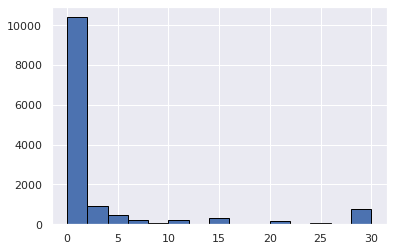

In [281]:
# CONFIRM PHYSHLTH DISTRIBUTION IS NOW READY FOR ANALYSIS.
fig, ax = plt.subplots()
ax.hist(df['PHYSHLTH'], edgecolor="black", bins=15);

In [282]:
# OBTAINING THE TOTAL NUMBER OF RELEVANT RECORDS REMAINING FOR PHYSHLTH
df.PHYSHLTH.value_counts().sum()

13659

## Confidence Interval for Mean of `PHYSHLTH`

In [283]:
# WE CALCULATE THE MEAN AND STANDARD ERROR OF PHYSHLTH
x_bar = np.mean(df.PHYSHLTH)
samp_std = np.std(df.PHYSHLTH, ddof = 1)
se = samp_std/np.sqrt(len(df.PHYSHLTH))
print("Mean:", x_bar,)  
print("Standard Error:", se)

Mean: 3.064646020938575
Standard Error: 0.06486877124339503


In [284]:
# WE USE SCIPY.STATS TO GET A 95 PERCENT CONFIDENCE INTERVAL
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(df.PHYSHLTH)-1,                    # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = se)                                # Standard deviation estimate

(2.9374942974789575, 3.1917977443981926)

## Interpretation of Confidence Interval
Based on the above calculations, if 100 samples were pulled, with about the same sample sizes, and with confidence intervals formed in the same manner, we would expect at least 95 of the intervals to contain the true population mean for `PHYSHLTH`. Notably, our instant sample mean, 3.06, falls within the confidence interval constructed above. 

## Differences in `PHYSHLTH` Based on `RENTHOM1` 

Next, this analysis subsets our `PHYSHLTH` sample data by responses contained in the `RENTHOM1` variable - responses by people who reported owning a home and those who reported renting a home.   

In [285]:
# WE OBTAIN THE TOTAL RESPONSES FOR OWN(1.0) AND RENT(2.0)
df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [286]:
# WE SUBSET THE DATA
health_own = df.loc[df['RENTHOM1'] == 1.0, 'PHYSHLTH']
health_rent = df.loc[df['RENTHOM1'] == 2.0, 'PHYSHLTH']


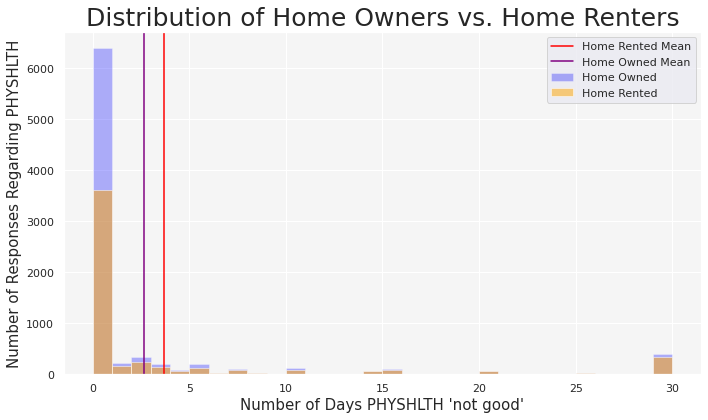

In [287]:
# WE CREATE A HISTOGRAM FOR DEMONSTRATING THE DIFFERENCE BETWEEN THE TWO SUBSETS, INCLUDING THE MEANS
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(health_own, alpha=.3, bins=30, color='blue', label='Home Owned')
ax.hist(health_rent, alpha=.5, bins =30, color='orange', label='Home Rented')
ax.set_facecolor("whitesmoke")
ax.set_xlabel("Number of Days PHYSHLTH 'not good'", size=15)
ax.set_ylabel("Number of Responses Regarding PHYSHLTH", size=15)
ax.set_title('Distribution of Home Owners vs. Home Renters', size=25)
ax.axvline(x_bar_rent.item(), color='red', label='Home Rented Mean')
ax.axvline(x_bar_own.item(), color='purple', label='Home Owned Mean')
ax.legend()
plt.tight_layout()
plt.show();

As can be seen in the histogram above, the distribution is heavily skewed to the right, with the bulk of the distribution lying predominantly along the y-axis and representing those respondents with zero days of poor health, which appears to be around 10,000 records. As such, the means of both subsets are significantly weighed down. The remainder of the distribution appears to consist of approximately 3500 records, with great variance; for instance, 30 days of poor health contains the second most frequent number of responses.  

Interestingly, the differential between the number of home owners and home renters is far less noticeable as the number of 'not good' physical health days increases.  While there are almost double the number of Home owners to Home Renters in this sample, it would not be as noticeable without a 'zero days' response column, where there are almost twice as many home owners to home renters.  Even in responses that fell between one and six days, there seems to be a much larger contingent of home owners to home renters.  Further along up the x-axis, as the days increase, the difference disappears and home renters even seems to eclipse home owners in many frequencies. We will confirm these suspicions with another quick plot.  

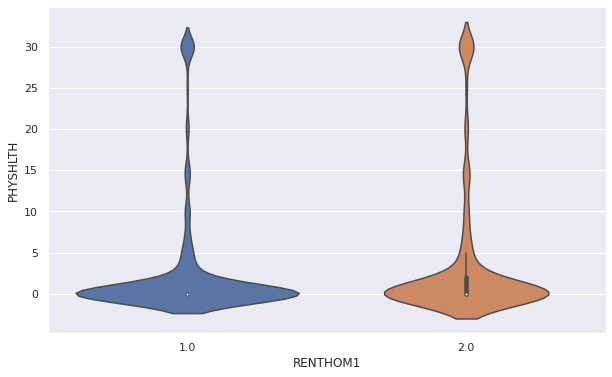

In [288]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data=df, x='RENTHOM1', y='PHYSHLTH');

The violin plot above similarly shows that the difference in subsets is heavily concentrated in the lowest number of days.  Indeed, this plot suggests that as the days increase, renters are more slightly more likely to have health that is not good.  More importantly, it confirms our suspicion that the mean difference may gravitate to the zero days column.  

### Is the Difference Statistically Significant?

In order to determine whether the difference in the two subset means above is statistically significant, this analysis will utilize a two tailed t-test.

Null Hypothesis: There is no statistically significant difference between the average number of days sick in persons sampled who own their home versus persons sampled who rent their home.  

Alternative Hypothesis: There is a statistically significant difference in the average number of days sick for those persons from the sample who rent their home versus those from the sample who own their home.  

In [289]:
# We use an independent ttest from scipy.stats to calculate a test statistic and p-value. We will perform two
# tests and assume variance is different in one of the tests. 
result = stats.ttest_ind(health_rent, health_own, equal_var=False)
print(result)


Ttest_indResult(statistic=7.388322797834266, pvalue=1.6084644296491685e-13)


The result of the ttest gives us a p-value that is exponentially smaller than an alpha value of 5 percent percent, or even 1 percent for that matter.  This means there is an infinitesimally small chance that the results we are seeing are due to randomness.  While there still could be a lurking variable causing the difference in the means, we can probably safely reject the null hypothesis and accept the alternative hypothesis - concluding that it is statistically unlikely that that there is no difference between the means.     

## Next Steps
Notably, a deeper examination of the effect size would be an appropriate next step under the circumstances.  Just because there is a very small chance of committing a type 1 error does not necessarily mean that the magnitude of the differences between the means observed in `RENTHOM1` is significant. 

Nevertheless, there could be a multitude of other variables causing the results we see.  To that end, it would be most interesting to study the relationship of `PHYSHLTH` with income level, identified by the CDC codebook as `INCOME2`.  Indeed, `INCOME2` might shed light on the differences in the means of `RENTHOM1`.  Perhaps individuals who have greater incomes are more likely to own their homes, rather than rent.  

Furthermore, it would not be surprising to see persons with higher incomes to be more likely to see a doctor more frequently. As such, variables in the Health Care Access section of the codebook such as `MEDCOST` or `CHECKUP1` could help explain our observations.  